# Geometric Transform

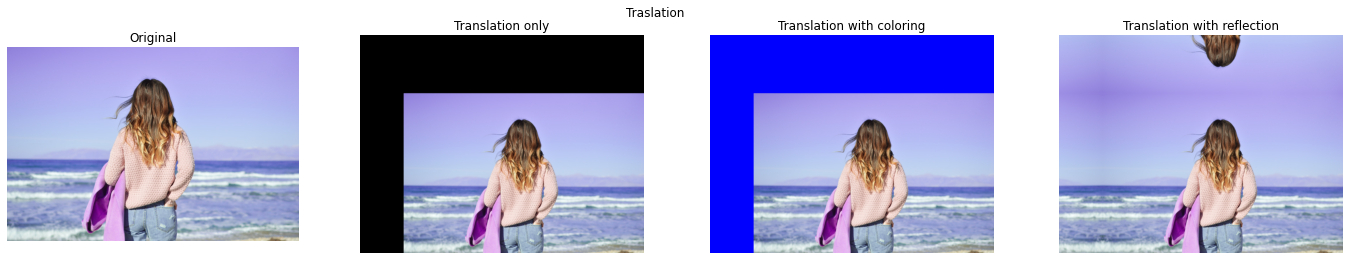

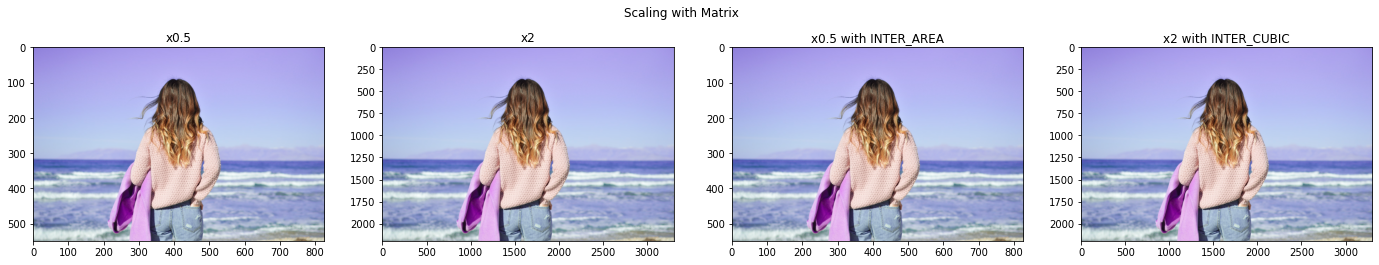

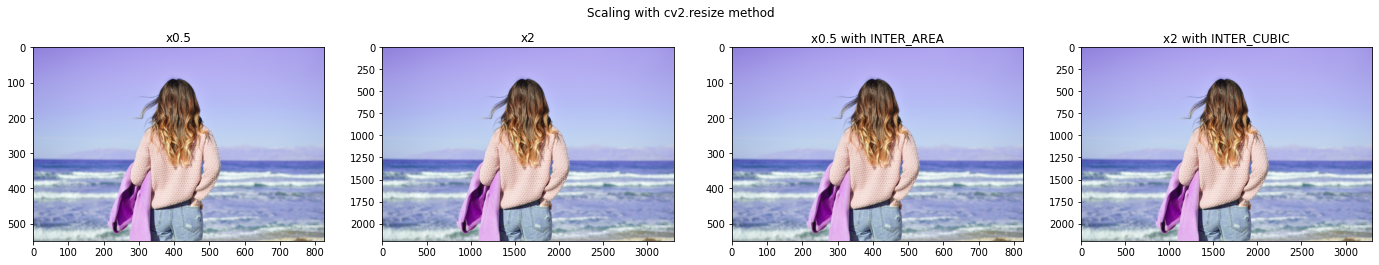

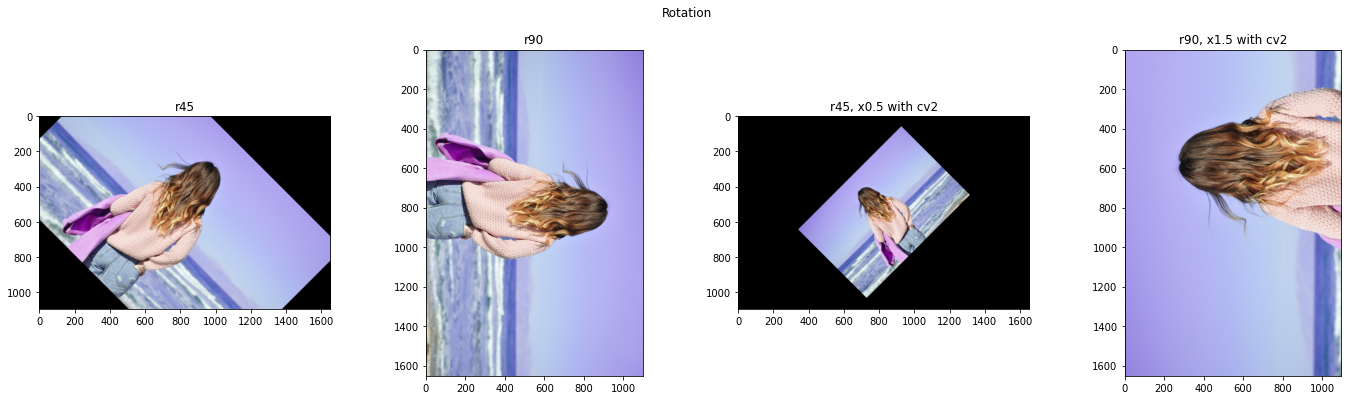

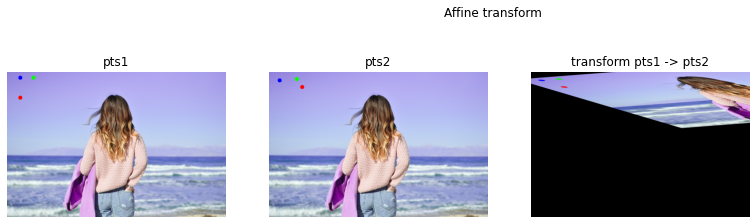

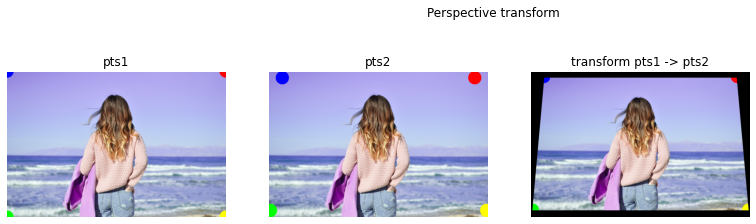

In [4]:
"""
import urllib.request
url = 'https://images.unsplash.com/photo-1515052945961-bbb80118b74b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1652&q=80'
filename = './image/back.jpg'
urllib.request.urlretrieve(url, filename)
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./image/back.jpg')
rows, cols = img.shape[0:2]

"""
Traslation
"""
dx, dy = 300, 400

matrix = np.float32([[1,0,dx],
                   [0,1,dy]])

dst = cv2.warpAffine(img, matrix, (cols+dx, rows+dy))

dst2 = cv2.warpAffine(img, matrix, (cols+dx, rows+dy), None, \
                     cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0))

dst3 = cv2.warpAffine(img, matrix, (cols+dx, rows+dy), None, \
                     cv2.INTER_LINEAR, cv2.BORDER_REFLECT, (255,0,0))

imgs = {'Original' : img, 
        'Translation only': dst, 
        'Translation with coloring': dst2, 
        'Translation with reflection': dst3}

plt.figure(figsize=(24,4))
plt.suptitle("Traslation")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
    
plt.show()


"""
Scaling
"""

matrix_x0_5 = np.float32([[0.5,  0, 0],
                          [  0,0.5, 0]])
matrix_x2 = np.float32([[2, 0, 0],
                        [0, 2, 0]])

dst1 = cv2.warpAffine(img, matrix_x0_5, (int(cols*0.5), int(rows*0.5)))
dst2 = cv2.warpAffine(img, matrix_x2, (int(cols*2), int(rows*2)))
dst3 = cv2.warpAffine(img, matrix_x0_5, (int(cols*0.5), int(rows*0.5)), \
                      None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, matrix_x2, (int(cols*2), int(rows*2)), \
                      None, cv2.INTER_CUBIC)

imgs = {'x0.5' : dst1, 
        'x2': dst2, 
        'x0.5 with INTER_AREA': dst3, 
        'x2 with INTER_CUBIC': dst4}

plt.figure(figsize=(24,4))
plt.suptitle("Scaling with Matrix")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    
plt.show()


dst1 = cv2.resize(img, (int(cols*0.5), int(rows*0.5)))
dst2 = cv2.resize(img, None, None, 2, 2)
dst3 = cv2.resize(img, (int(cols*0.5), int(rows*0.5)), interpolation=cv2.INTER_AREA)
dst4 = cv2.resize(img, None, None, 2, 2, cv2.INTER_CUBIC)

imgs = {'x0.5' : dst1, 
        'x2': dst2, 
        'x0.5 with INTER_AREA': dst3, 
        'x2 with INTER_CUBIC': dst4}

plt.figure(figsize=(24,4))
plt.suptitle("Scaling with cv2.resize method")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
plt.show()

"""
Rotation
"""
d45 = 45.0 * np.pi / 180.0
d90 = 90.0 * np.pi / 180.0

m45 = np.float32( [[np.cos(d45), -1*np.sin(d45), rows//2],
                   [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[np.cos(d90), -1*np.sin(d90), rows],
                   [np.sin(d90), np.cos(d90), 0]])
m45_cv = cv2.getRotationMatrix2D((cols/2, rows/2),45,0.5)
m90_cv = cv2.getRotationMatrix2D((cols/2, rows/2),90,1.5)

r45 = cv2.warpAffine(img, m45, (cols, rows))
r90 = cv2.warpAffine(img, m90, (rows, cols))
r45_cv = cv2.warpAffine(img, m45_cv, (cols, rows))
r90_cv = cv2.warpAffine(img, m90_cv, (rows, cols))

imgs = {'r45' : r45, 
        'r90': r90, 
        'r45, x0.5 with cv2': r45_cv, 
        'r90, x1.5 with cv2': r90_cv}

plt.figure(figsize=(24,6))
plt.suptitle("Rotation")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
plt.show()

"""
Affine transform
"""

pts1 = np.float32([[100, 50],[200,50],[100,200]])
pts2 = np.float32([[80, 70],[210,60],[250,120]])

img_pts1 = img.copy()
img_pts2 = img.copy()

cv2.circle(img_pts1, (100,50), 15, (255,0), -1)
cv2.circle(img_pts1, (200,50), 15, (0,255,0), -1)
cv2.circle(img_pts1, (100,200), 15, (0,0,255), -1)

cv2.circle(img_pts2, (80,70), 15, (255,0), -1)
cv2.circle(img_pts2, (210,60), 15, (0,255,0), -1)
cv2.circle(img_pts2, (250,120), 15, (0,0,255), -1)

mat = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_pts1, mat, (cols, rows))

imgs = {'pts1' : img_pts1, 
        'pts2': img_pts2, 
        'transform pts1 -> pts2': dst}

plt.figure(figsize=(18,4))
plt.suptitle("Affine transform")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Perspective transform
"""

pts1 = np.float32([[0, 0],[0, rows],[cols, 0],[cols, rows]])
pts2 = np.float32([[100, 50],[10, rows-50],[cols-100, 50],[cols-10, rows-50]])

img_pts1 = img.copy()
img_pts2 = img.copy()

cv2.circle(img_pts1, (0,0), 50, (255,0), -1)
cv2.circle(img_pts1, (0,rows), 50, (0,255,0), -1)
cv2.circle(img_pts1, (cols,0), 50, (0,0,255), -1)
cv2.circle(img_pts1, (cols,rows), 50, (0,255,255), -1)

cv2.circle(img_pts2, (100,50), 50, (255,0), -1)
cv2.circle(img_pts2, (10,rows-50), 50, (0,255,0), -1)
cv2.circle(img_pts2, (cols-100,50), 50, (0,0,255), -1)
cv2.circle(img_pts2, (cols-10,rows-50), 50, (0,255,255), -1)

mat = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img_pts1, mat, (cols, rows))

imgs = {'pts1' : img_pts1, 
        'pts2': img_pts2, 
        'transform pts1 -> pts2': dst}

plt.figure(figsize=(18,4))
plt.suptitle("Perspective transform")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()

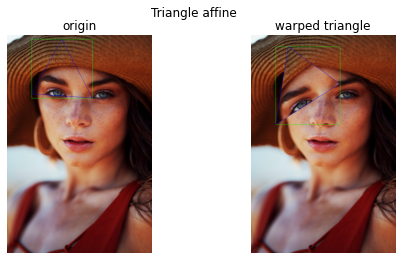

execute time - matrix: 0.0008668899536132812
execute time - remap: 0.002061605453491211


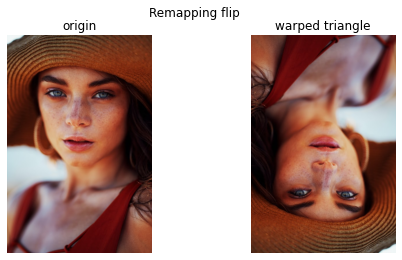

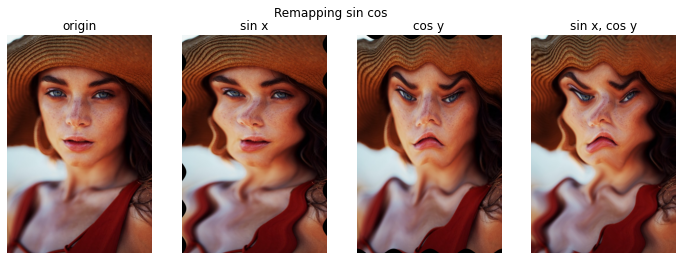

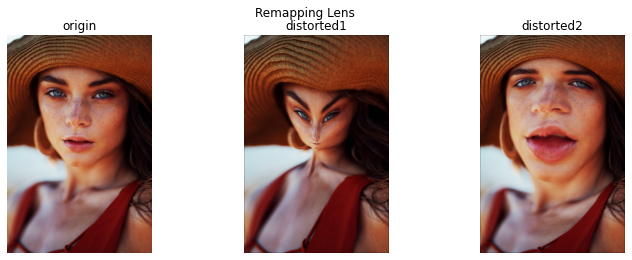

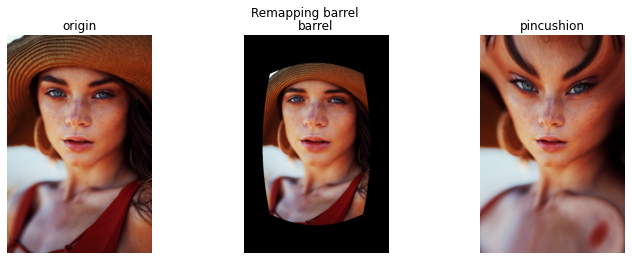

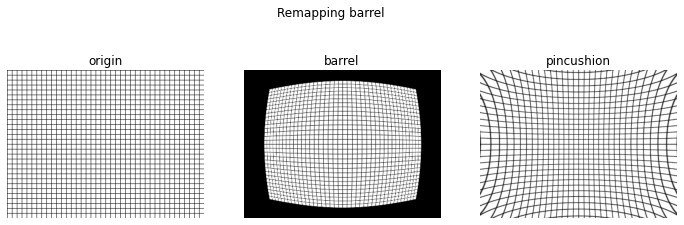

In [38]:
"""
import urllib.request
url = 'https://images.unsplash.com/photo-1543096222-72de739f7917?ixid=MXwxMjA3fDB8MHx0b3BpYy1mZWVkfDU3fHRvd0paRnNrcEdnfHxlbnwwfHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60'
filename = './image/Akira.jpg'
urllib.request.urlretrieve(url, filename)
"""

"""
Triangle affine
"""

import cv2
import numpy as np

img = cv2.imread("./image/Akira.jpg")
img2 = img.copy()
draw = img.copy()

pts1 = np.float32( [[188, 14], [85, 202], [294, 216]] )
pts2 = np.float32( [[128, 40], [85, 307], [306, 167]] )

x1, y1, w1, h1 = cv2.boundingRect(pts1)
x2, y2, w2, h2 = cv2.boundingRect(pts2)

roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]

offset1 = np.zeros((3,2), np.float32)
offset2 = np.zeros((3,2), np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0] - x1, pts1[i][1] - y1
    offset2[i][0], offset2[i][1] = pts2[i][0] - x2, pts2[i][1] - y2
    
matrix = cv2.getAffineTransform(offset1, offset2)
# warped = cv2.warpAffine(roi1, matrix, (w2, h2), None , cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)
warped = cv2.warpAffine(roi1, matrix, (w2, h2))


mask = np.zeros((h2, w2), dtype=np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))

warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

cv2.rectangle(draw, (x1, y1), (x1+w1, y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0,255,0), 1)
cv2.polylines(img2, [pts2.astype(np.int32)], True, (255,0,0), 1)

imgs = {'origin' : draw, 
        'warped triangle': img2}

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.suptitle("Triangle affine")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Remapping flip
"""
import time

img = cv2.imread("./image/Akira.jpg")
rows, cols = img.shape[:2]

# flip using affine matrix
st = time.time()
mflip = np.float32( [[-1, 0, cols-1], [0, -1, rows-1]])
fliped1 = cv2.warpAffine(img, mflip, (cols, rows))
print('execute time - matrix:', time.time()-st)

# flip using remap function
st2 = time.time()
mapy, mapx = np.indices((rows, cols), dtype=np.float32)
mapx = cols -mapx-1
mapy = rows - mapy - 1
fliped2 = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
print('execute time - remap:', time.time()-st2)

imgs = {'origin' : img, 
        'warped triangle': fliped1,
        'warped triangle': fliped2}

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.suptitle("Remapping flip")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Remapping sin cos
"""
l = 20
amp = 15

img = cv2.imread("./image/Akira.jpg")
rows, cols = img.shape[:2]

mapy, mapx = np.indices((rows, cols), dtype=np.float32)
sinx = mapx + amp * np.sin(mapy/l)
cosy = mapy + amp * np.cos(mapx/l)

img_sinx = cv2.remap(img, sinx, mapy, cv2.INTER_LINEAR)
img_cosy = cv2.remap(img, mapx, cosy, cv2.INTER_LINEAR)
img_both = cv2.remap(img, sinx, cosy, cv2.INTER_LINEAR, None, cv2.BORDER_REPLICATE)

imgs = {'origin' : img, 
        'sin x': img_sinx,
        'cos y': img_cosy,
        'sin x, cos y': img_both,}

plt.figure(figsize=(12,4))
plt.suptitle("Remapping sin cos")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Remapping Lens
"""
img = cv2.imread("./image/Akira.jpg")
rows, cols = img.shape[:2]

def distort(exp, scale):
    mapy, mapx = np.indices((rows, cols), dtype=np.float32)

    mapx = 2*mapx/(cols - 1) -1
    mapy = 2*mapy/(rows - 1) -1

    r, theta = cv2.cartToPolar(mapx, mapy)

    r[r<scale] = r[r<scale] ** exp

    mapx, mapy = cv2.polarToCart(r, theta)

    mapx = ((mapx + 1) * cols - 1)/2
    mapy = ((mapy + 1) * rows - 1)/2

    return cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

distorted1 = distort(exp=0.5, scale=1)
distorted2 = distort(exp=1.5, scale=1)

imgs = {'origin' : img, 
        'distorted1': distorted1,
       'distorted2': distorted2,}

plt.figure(figsize=(12,4))
plt.suptitle("Remapping Lens")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Remapping barrel
"""
img = cv2.imread("./image/Akira.jpg")
rows, cols = img.shape[:2]

def distort(k1, k2, k3):
    mapy, mapx = np.indices((rows, cols), dtype=np.float32)

    mapx = 2*mapx/(cols - 1) -1
    mapy = 2*mapy/(rows - 1) -1
    r, theta = cv2.cartToPolar(mapx, mapy)
    
    ru = r * (1+k1*(r**2) + k2*(r**4) + k3*(r**6))

    mapx, mapy = cv2.polarToCart(ru, theta)
    mapx = ((mapx + 1) * cols - 1)/2
    mapy = ((mapy + 1) * rows - 1)/2

    return cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

distorted1 = distort(k1=0.5, k2=0.2, k3=0.0) ## barrel distortion
distorted2 = distort(k1=-0.3, k2=0.0, k3=0.0) ## pincushion distortion

imgs = {'origin' : img, 
        'barrel': distorted1,
        'pincushion': distorted2,}

plt.figure(figsize=(12,4))
plt.suptitle("Remapping barrel")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Undistortion
"""
img = np.full((300,400,3), 255, np.uint8)
img[::10, :, :] = 0
img[:, ::10, :] = 0
height, width = img.shape[:2]

def distort(k1, k2, p1, p2):
    distCoeff = np.float64([k1, k2, p1, p2])

    fx, fy = 10, 10
    cx, cy = width/2, height/2
    camMtx = np.float64([[fx, 0, cx],
                         [0, fy, cy],
                         [0, 0, 1]])

    return cv2.undistort(img, camMtx, distCoeff)

distorted1 = distort(k1=0.001, k2=0, p1=0, p2=0) ## barrel distortion
distorted2 = distort(k1=-0.0005, k2=0, p1=0, p2=0) ## pincushion distortion

imgs = {'origin' : img, 
        'barrel': distorted1,
        'pincushion': distorted2,}

plt.figure(figsize=(12,4))
plt.suptitle("Remapping barrel")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()
